# Iterative Nature of Prompt Engineering

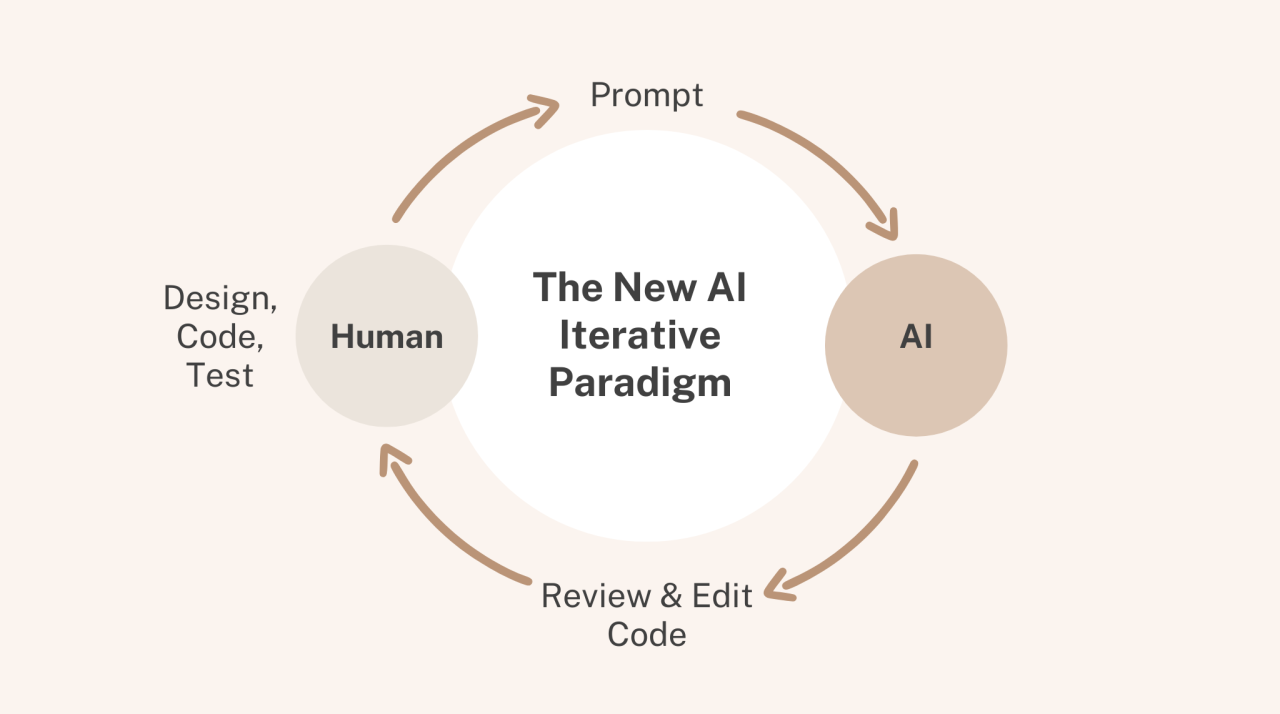

If you’ve taken a machine learning course before, you’re likely familiar with the idea that ML development is an iterative process. It typically starts with gathering data and training a model to produce initial results. From there, you analyze the output perhaps through error analysis to understand where the model performs well or falls short. Based on these insights, you might refine your understanding of the problem itself, adjust your approach, modify the implementation, and run another experiment. This cycle of experimentation and refinement continues until you develop an effective model.
Prompt engineering for large language models (LLMs) follows a similar iterative pattern. You begin with a goal or task in mind and draft an initial prompt ideally one that is clear, specific, and allows the model enough room to reason if necessary. After running this prompt, you evaluate the results. If the output isn't satisfactory, you identify what went wrong perhaps the instructions were ambiguous, or the model wasn’t guided properly. You then revise the prompt and test again. This process of refining the idea and the prompt continues in loops until you achieve the desired behavior from the model.

# Setting Up Work Environment

In [2]:
!pip install --upgrade google-generativeai

In [3]:
!pip install -q -U google-genai

In [4]:
import os
from google import genai
import google.generativeai as ggenai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown

from PIL import Image
from google.genai import types

from IPython.display import HTML

In [5]:
# Set up the API key (Replace 'YOUR_API_KEY' with your actual Gemini API key)
key = userdata.get('genai_api')
client = genai.Client(api_key=key)

List the set of available models

In [6]:
ggenai.configure(api_key=key)

models = ggenai.list_models()
for model in models:
    print(model.name)

models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-ex

Create a helper function to make it easier to use prompts and look at generated outputs.

In [13]:
def get_completion(prompt, model="gemini-1.5-flash"):
  response = client.models.generate_content(
      model=model,
      contents=prompt,
      config=types.GenerateContentConfig(max_output_tokens=100, temperature=0.1)
      )
  return response.text  # Extract the generated text

# Generate a marketing product description from a product fact sheet

In [9]:
fact_sheet_laptop = """
OVERVIEW

Introducing our sleek Laptop Series, an embodiment of cutting-edge design and functionality for modern workspaces.
Part of a sophisticated family of tech-inspired devices, including laptops, docking stations, accessories, and more.
Available in multiple colors and finishes to seamlessly integrate with your personal or professional aesthetic.
Crafted with premium materials for a durable and stylish appeal.
Suitable for a variety of environments, whether it's your home office or a corporate setting.
Engineered for superior performance and productivity, making it an ideal choice for professionals.
DESIGN

The laptop is available in various color options, allowing you to personalize it to your preference.
Choose between different finishes, including brushed aluminum, matte black, glossy white, or chrome accents.
Select from configurations with a standard display or a touchscreen option.
Options for additional features such as a backlit keyboard, fingerprint sensor, or face recognition technology.
Sleek and lightweight design for portability without compromising on power.
SPECIFICATIONS

Powerful Intel/AMD processors for seamless multitasking and high-performance computing.
Ultra-thin design with dimensions:
WIDTH 35 CM | 13.78"
DEPTH 24 CM | 9.45"
HEIGHT 1.5 CM | 0.59"
Crisp and vibrant display with a resolution tailored for immersive work or entertainment experiences.
OPTIONS

Choose between SSD or HDD storage options for speed and capacity tailored to your needs.
Various connectivity options, including USB-C, HDMI, and Thunderbolt for versatile compatibility.
Different RAM configurations to suit your processing requirements.
Options for operating systems, catering to both Windows and MacOS preferences.
MATERIALS

Durable aluminum casing for a premium look and robust protection.
High-resolution display with anti-glare coating for comfortable viewing in any lighting condition.
Cutting-edge cooling technology to ensure optimal performance during extended usage.
COUNTRY OF ORIGIN

Crafted with precision in state-of-the-art facilities in Japan, combining traditional craftsmanship with technological innovation.

"""

In [15]:
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

Technical specifications: ```{fact_sheet_laptop}```
"""
response = get_completion(prompt)
response

"Introducing the sleek and powerful Laptop Series – designed for modern professionals who demand both style and substance.  This isn't just a laptop; it's a statement.  Choose from a range of sophisticated colors and finishes, including brushed aluminum, matte black, glossy white, and chrome accents, to perfectly complement your personal style.  Crafted with premium materials in Japan, this laptop boasts a durable aluminum casing and a vibrant, anti-glare display for comfortable viewing, wherever you work.\n\n"

# Overcoming Too-Long LLM Results

Limit the number of words/sentences/characters.

In [16]:
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_laptop}```
"""
response = get_completion(prompt)
response

'Sleek and powerful laptop, crafted in Japan with premium materials.  Choose from vibrant colors, customizable specs (Intel/AMD processors, SSD/HDD storage), and multiple display/connectivity options.  Perfect for work or play.\n'

In [17]:
len(response.split())

29

# Force the LLM to Focus on Certain Details

Ask it to focus on the aspects that are relevant to the intended audience.

In [18]:
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

The description is intended for laptop retailers,
so should be technical in nature and focus on the
materials the product is constructed from.

At the end of the description, include every 7-character
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_laptop}```
"""
response = get_completion(prompt)
response

'This laptop boasts a durable aluminum casing and high-resolution anti-glare display.  Its sleek design incorporates cutting-edge cooling technology. Product IDs:  There are no 7-character product IDs in the provided text.\n'

# Description needs a table of dimensions

Let’s explore a more complex prompt to better demonstrate the capabilities of ChatGPT. In this example, the prompt includes a detailed product description, followed by a request to generate an HTML formatted output that includes a table with the product’s dimensions.

In practice, prompts like this are rarely written perfectly on the first try. They usually emerge after several rounds of iteration refining the instructions, adjusting formatting requests, and clarifying the expected output until the model responds as desired.

In [20]:
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

The description is intended for laptop retailers,
so should be technical in nature and focus on the
materials the product is constructed from.

At the end of the description, include every 7-character
Product ID in the technical specification.

After the description, include a table that gives the
product's dimensions. The table should have two columns.
In the first column include the name of the dimension.
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website.
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_laptop}```
"""

response = get_completion(prompt)
response

'```html\n<!DOCTYPE html>\n<html>\n<head>\n<title>Laptop Product Description</title>\n</head>\n<body>\n\n<div>\n  <h1>Sleek Laptop Series</h1>\n  <p>This laptop boasts a durable aluminum casing, providing robust protection and a premium aesthetic.  The high-resolution display features an anti-glare coating for comfortable viewing, regardless of lighting conditions.  Cutting-edge cooling technology ensures optimal performance even during extended'

In [21]:
from IPython.display import display, HTML
display(HTML(response))